In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.manifold import TSNE



In [2]:
# Load the dataset
df = pd.read_csv('zoo.csv')
df


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
# Assuming 'X' contains features and 'y' contains the target variable
X = df.drop('animal name', axis=1)  # Adjust 'class_type' with your actual target variable
y = df['animal name']
X


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
y

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1,2
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4


In [6]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,1
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
66,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
44,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [7]:
y_train

89        toad
26        frog
42    ladybird
70    reindeer
15    crayfish
        ...   
60        pike
71        rhea
14        crab
92        tuna
51        moth
Name: animal name, Length: 80, dtype: object

In [8]:
y_test

84    squirrel
55        oryx
66    porpoise
67        puma
45        lion
39    honeybee
22    elephant
44     leopard
10     cheetah
0     aardvark
18     dogfish
30        gnat
97        wasp
33        gull
77     seawasp
4         boar
93     vampire
78     skimmer
12        chub
31        goat
76    seasnake
Name: animal name, dtype: object

In [9]:
# Standardize the features
scaler = StandardScaler()




In [10]:
scaler

StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.77459667, -0.53881591,  0.7540739 , ..., -0.3992747 ,
        -0.83793058,  0.9926781 ],
       [-0.77459667, -0.53881591,  0.7540739 , ..., -0.3992747 ,
        -0.83793058,  0.9926781 ],
       [-0.77459667, -0.53881591,  0.7540739 , ..., -0.3992747 ,
        -0.83793058,  1.47107719],
       ...,
       [-0.77459667, -0.53881591,  0.7540739 , ..., -0.3992747 ,
        -0.83793058,  1.94947627],
       [-0.77459667, -0.53881591,  0.7540739 , ..., -0.3992747 ,
         1.19341628,  0.51427902],
       [ 1.29099445, -0.53881591,  0.7540739 , ..., -0.3992747 ,
        -0.83793058,  1.47107719]])

In [12]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.29099445, -0.53881591, -1.32612997,  1.32612997, -0.53881591,
        -0.7540739 , -1.07803625,  0.85972695,  0.46056619,  0.51946248,
        -0.22941573, -0.46056619, -0.40115051,  0.59660054, -0.3992747 ,
        -0.83793058, -0.92091824],
       [ 1.29099445, -0.53881591, -1.32612997,  1.32612997, -0.53881591,
        -0.7540739 , -1.07803625,  0.85972695,  0.46056619,  0.51946248,
        -0.22941573, -0.46056619,  0.58629689,  0.59660054, -0.3992747 ,
         1.19341628, -0.92091824],
       [-0.77459667, -0.53881591, -1.32612997,  1.32612997, -0.53881591,
         1.32612997,  0.92761259,  0.85972695,  0.46056619,  0.51946248,
        -0.22941573,  2.17124059, -1.38859791,  0.59660054, -0.3992747 ,
         1.19341628, -0.92091824],
       [ 1.29099445, -0.53881591, -1.32612997,  1.32612997, -0.53881591,
        -0.7540739 ,  0.92761259,  0.85972695,  0.46056619,  0.51946248,
        -0.22941573, -0.46056619,  0.58629689,  0.59660054, -0.3992747 ,
         1.19341628

In [13]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of 'n_neighbors'
knn.fit(X_train_scaled, y_train)



KNeighborsClassifier()

In [14]:
# Predictions on the test set
y_pred = knn.predict(X_test_scaled)

y_pred

array(['hare', 'antelope', 'dolphin', 'lynx', 'lynx', 'frog', 'antelope',
       'lynx', 'lynx', 'bear', 'catfish', 'flea', 'frog', 'crow', 'clam',
       'lynx', 'fruitbat', 'crow', 'bass', 'calf', 'catfish'],
      dtype=object)

In [15]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)



d:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [16]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

    aardvark       0.00      0.00      0.00       1.0
    antelope       0.00      0.00      0.00       0.0
        bass       0.00      0.00      0.00       0.0
        bear       0.00      0.00      0.00       0.0
        boar       0.00      0.00      0.00       1.0
        calf       0.00      0.00      0.00       0.0
     catfish       0.00      0.00      0.00       0.0
     cheetah       0.00      0.00      0.00       1.0
        chub       0.00      0.00      0.00       1.0
        clam       0.00      0.00      0.00       0.0
        crow       0.00      0.00      0.00       0.0
     dogfish       0.00      0.00      0.00       1.0
     dolphin       0.00      0.00      0.00       0.0
    elephant       0.00      0.00      0.00       1.0
        flea       0.00      0.00      0.00       0.0
        frog       0.00      0.00      0.00       0.0
    fruitbat       0.00      0.00      0.00 

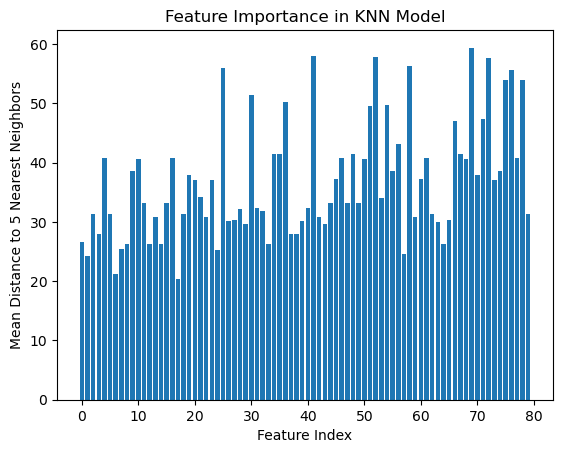

In [17]:
# Visualization 1: Feature Importance
# Plot the feature importance based on the distances to the k-nearest neighbors
# (Note: Feature importance interpretation may vary depending on the dataset)
feature_importance = knn.kneighbors(X_train_scaled, 5, return_distance=False).mean(axis=1)
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Mean Distance to 5 Nearest Neighbors')
plt.title('Feature Importance in KNN Model')
plt.show()



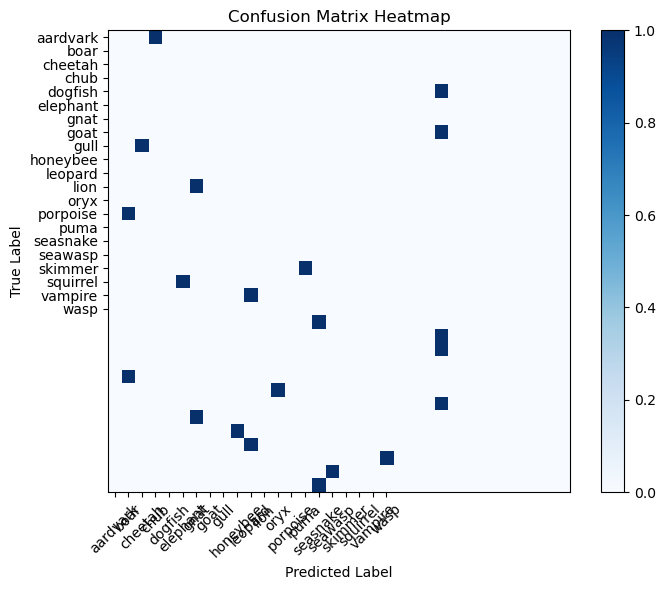

In [18]:
# Visualization 2: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix Heatmap')
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


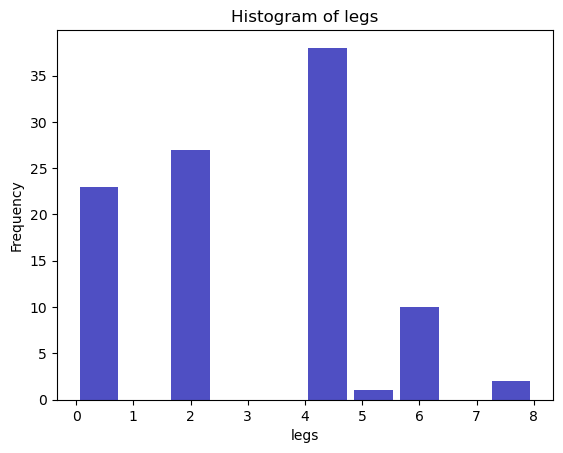

In [19]:
# Visualization 3: Histogram for a Selected Feature
selected_feature = 'legs'  # Replace with the feature you want to visualize
plt.hist(df[selected_feature], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Histogram of ' + selected_feature)
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.show()

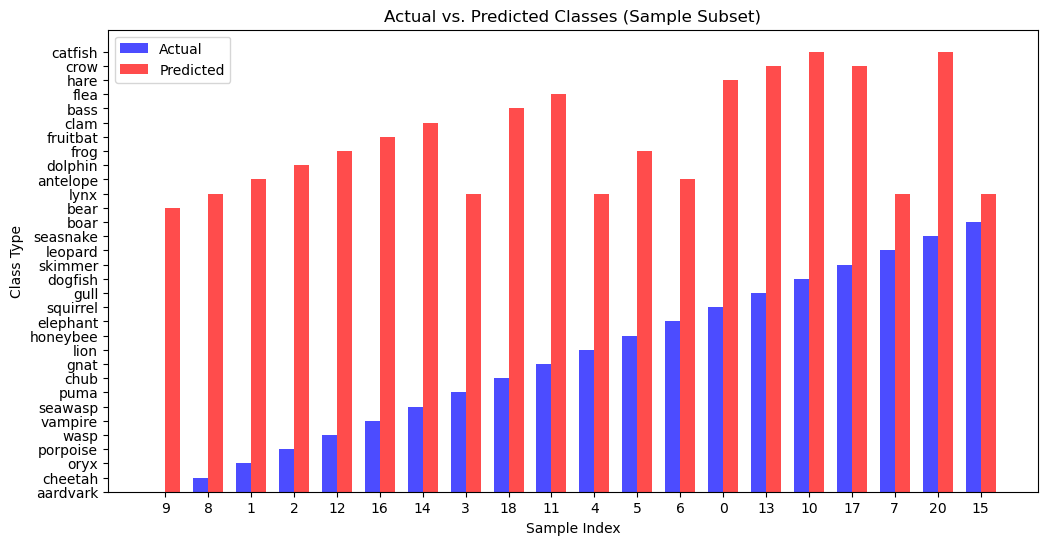

In [20]:
# Visualization: Bar Plot for Actual vs. Predicted Classes
n_samples = min(X_test_scaled.shape[0], 20)  # Choose the number of samples to visualize
indices = np.random.choice(X_test_scaled.shape[0], n_samples, replace=False)

actual_classes = y_test.iloc[indices]
predicted_classes = y_pred[indices]

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(n_samples)

plt.bar(index, actual_classes, bar_width, label='Actual', color='b', alpha=0.7)
plt.bar(index + bar_width, predicted_classes, bar_width, label='Predicted', color='r', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Class Type')
plt.title('Actual vs. Predicted Classes (Sample Subset)')
plt.xticks(index + bar_width / 2, indices)
plt.legend()
plt.show()
